In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, show, subplot, title, hist, cm
from skimage import data, filters
import pydicom as dicom
from PIL import Image
import PIL
from skimage import feature
import numpy as np



(-0.5, 1298.5, 1578.5, -0.5)

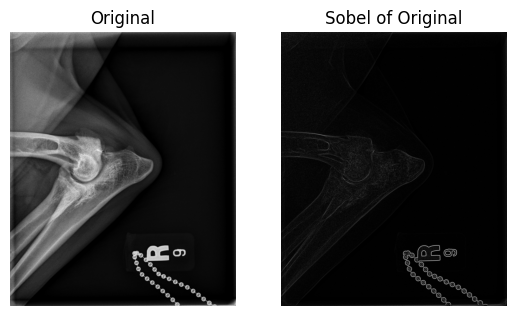

In [10]:
#canny filter radiograph
#read radiograph image
#C:\Users\Blanca\OneDrive\Desktop\Senior Design\Anonymous Rad Pt 2\R1\Elbow_Lf_Rf - 145421\Right_Fore_CR_CD_Extremity_10\IM-0003-0001.dcm
#path = input("Enter radiograph path:")
path = r'C:\Users\Blanca\OneDrive\Desktop\Senior Design\Anonymous Rad Pt 2\R1\Elbow_Lf_Rf-145421\Right_Lateral_Fore_Extremity_4\IM-0002-0001.dcm'
rawImage = dicom.dcmread(path)
rgimg = rawImage.pixel_array # 12-bit

subplot(1,2,1)
cannyR = feature.canny(rgimg, sigma = 3)
imshow(cannyR,cmap='gray')
title('canny')
plt.grid(False)
plt.axis('off')

subplot(1,2,2)
sobelR = 50*filters.sobel(rgimg)
imshow(sobelR,cmap='gray')
title('Sobel of Original')
plt.grid(False)
plt.axis('off')

#canny doesnt work for our radiographs but this filter did work for test image prom SciKit image...



In [78]:
# check if input file is dicom
path = input("Enter DICOM file path:")
while True: 
    if path[-4:] != '.dcm':
        path = input('The file you entered is not a DICOM file. Please re-enter a path leads to a .dcm file.')
    else:
        break
    

In [ ]:
#sobel validation protocol
sog = filters.sobel(rgimg) #sobel of original
sor = filters.sobel(deblurImage) #sobel of gaussian blur result

#scale intesity to match sobel of original
sogmax = np.max(sog) 
sormax = np.max(sor)
a = sor/(sormax/sogmax)
#SSIM sobel of original radiograph with sobel of gaussian blur image
#after scaling intensity values to match 
ssim = skimage.metrics.structural_similarity(sog,a)
print('SSIM value',ssim)

sobelResult = np.add(deblurImage,sor)

In [ ]:
#percent accuracy for response 2
pred_labels = [1, 0, 0, 3, 1, 1, 2]
true_labels = [1, 0, 1, 3, 1, 2, 2]

# Calculate accuracy
correct_count = sum(pred == true for pred, true in zip(pred_labels, true_labels))
total_count = len(pred_labels)
accuracy = (correct_count / total_count) * 100

predEn = [1, 0, 3, 1, 1, 1, 2]
trueEn = [2, 1, 3, 1, 2, 0, 1]
correct_countEn= sum(pred == true for pred, true in zip(predEn, trueEn))
total_countEn = len(predEn)
accuracyEn = (correct_countEn / total_countEn) * 100

# Print percent accuracy
print("Percent Accuracy for Original:", accuracy)
print("Percent Accuracy for Enhanced:", accuracyEn)

In [ ]:
#percent accuracy for response 1
pred_labels = [1, 0, 0, 3, 0, 1, 1]
true_labels = [1, 0, 1, 3, 1, 2, 2]

# Calculate accuracy
correct_count = sum(pred == true for pred, true in zip(pred_labels, true_labels))
total_count = len(pred_labels)
accuracy = (correct_count / total_count) * 100

predEn = [1, 1, 3, 1, 1, 0, 0]
trueEn = [2, 1, 3, 1, 2, 0, 1]
correct_countEn= sum(pred == true for pred, true in zip(predEn, trueEn))
total_countEn = len(predEn)
accuracyEn = (correct_countEn / total_countEn) * 100

# Print percent accuracy
print("Percent Accuracy for Original:", accuracy)
print("Percent Accuracy for Enhanced:", accuracyEn)

In [ ]:
#Guassian deblur validation 

def maxOfArray(array):
    m, n = np.shape(array) # maxOfArray verified using np.max() May 20, 2023 6:00 PM
    tempMax = array[0:m,0]
    indexNum = 0
    for i in array:
        tempMax[indexNum] = max(i)
        indexNum +=1
    compInt = max(tempMax)
    return compInt


compInt = maxOfArray(rgimg) # intnesity to compensate for filters, typically scale to values of -1 to 1
gaussImage = 4095* skimage.filters.gaussian(rgimg,20) # standard deviation of 20
deblurImage = np.subtract(rgimg, gaussImage)
#imshow(deblurImage,cmap='gray')
#axis('off')
imshow(gaussImage,cmap='gray')
dmax = np.max(deblurImage)
print('deblur max:', dmax)
psnr = skimage.metrics.peak_signal_noise_ratio(rgimg, deblurImage)
print(psnr)